# 벤포드의 법칙 (Benford law)

<img width="50%" src="https://i.imgur.com/FmExD6c.png" >


### 2019 [FinanceData.KR](http://financedata.kr) | [facebook.com/financedata](http://facebook.com/financedata)


# 벤포드의 법칙 (Benford law)
임의의 데이터 집합에서 처음 시작하는 수로 가장 많이 등장하는 것이 '1'이고, '2', '3' 순서대로 낮아 진다는 법칙

* 데이터의 첫 자리가 1인 경우가 가장 많다 (30%)
* 첫 자리의 숫자의 비율은 로그에 따라 결정
* 첫 자리 1: 30.1%, 2: 17.6%, 3: 12.5% ...

$$ 
P(d) = \log_{10}\left( \frac{d+1}{d} \right)
$$

[Benford's law (wikipedia)](https://en.wikipedia.org/wiki/Benford's_law)

## 벤포드 값 구하기

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.grid'] = True 
plt.rcParams['lines.linewidth'] = 2

In [2]:
import numpy as np

for d in range(1, 10):
  v = np.log10((d+1)/d)
  print('{:.4f}'.format(v))

0.3010
0.1761
0.1249
0.0969
0.0792
0.0669
0.0580
0.0512
0.0458


In [3]:
benford_values =  {d:np.log10((d+1)/d) for d in range(1,10)}
benford_values

{1: 0.3010299956639812,
 2: 0.17609125905568124,
 3: 0.12493873660829993,
 4: 0.09691001300805642,
 5: 0.07918124604762482,
 6: 0.06694678963061322,
 7: 0.05799194697768673,
 8: 0.05115252244738129,
 9: 0.04575749056067514}

In [4]:
import pandas as pd

df = pd.DataFrame({'benford': benford_values})
df

,benford
1,0.301030
2,0.176091
3,0.124939
4,0.096910
5,0.079181
6,0.066947
7,0.057992
8,0.051153
9,0.045757


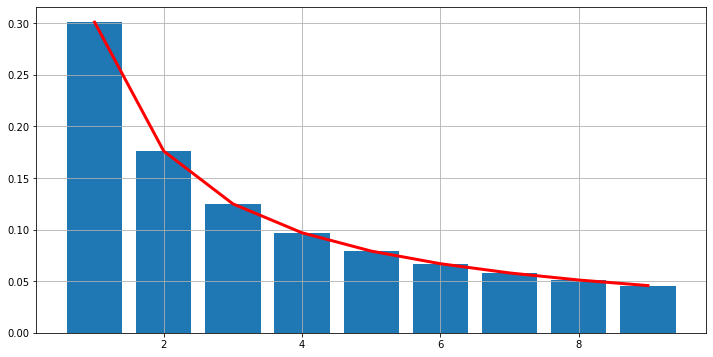

In [5]:
plt.bar(range(1, 10), df.benford)
plt.plot(range(1, 10), df.benford, color='r', lw=3)

# 조작된 영수증을 찾아라 

<img width="80%" src="https://i.imgur.com/tX4mtlX.png" >

http://hkconsensus.hankyung.com/apps.analysis/analysis.downpdf?report_idx=522341


## Enron 회계 조작사건 
2001년 미국 수학자 마크 니그리니가 벤포드 법칙을 통해 회계 부정을 적발

<img src="https://i.imgur.com/mSGkPo2.jpg" >

https://successfulportfolios.com/good-clean-fun-with-numbers/

# 다양한 사례
* [영국 LIBOR, 은행들 간의 금리 조작 담합 적발](https://dbr.donga.com/article/view/1206/article_no/6853)
* [2009년 이란 부정선거의 증거](https://en.wikipedia.org/wiki/Iranian_presidential_election,_2009)
* [그리스가 EU 가입시 제출한 거시경제 지표 조작](https://www.forbes.com/sites/timworstall/2011/09/12/greece-was-lying-about-its-budget-numbers)


# 전자공시(DART) 재무제표 데이터

#### 삼성전자 사업보고서 (2018년) (공시일자: 2019-04-01)
http://dart.fss.or.kr/dsaf001/main.do?rcpNo=20190401004781

#### III. 재무에 관한 사항 / 2. 연결재무제표
http://dart.fss.or.kr/report/viewer.do?rcpNo=20190401004781&dcmNo=6616741&eleId=13&offset=625579&length=120141&dtd=dart3.xsd

(개별 보고서의 프레임소스 보기를 통해 본문의 URL을 얻을 수 있습니다)


In [6]:
import pandas as pd

# 2016년, 2017년, 2018년 재무제표 (연결 재무상태표)
url = 'http://dart.fss.or.kr/report/viewer.do?rcpNo=20190401004781&dcmNo=6616741&eleId=13&offset=625579&length=120141&dtd=dart3.xsd'

df_list = pd.read_html(url)
len(df_list)

15

In [7]:
# 연결 재무상태표(BS)
df_bs = df_list[1].astype(str)
df_bs.head(20)

,Unnamed: 0,제 50 기,제 49 기,제 48 기
0,자산,nan,nan,nan
1,유동자산,174697424,146982464,141429704
2,현금및현금성자산,30340505,30545130,32111442
3,단기금융상품,65893797,49447696,52432411
4,단기매도가능금융자산,nan,3191375,3638460
5,단기상각후원가금융자산,2703693,nan,nan
6,단기당기손익-공정가치금융자산,2001948,nan,nan
7,매출채권,33867733,27695995,24279211
8,미수금,3080733,4108961,3521197
9,선급금,1361807,1753673,1439938


In [8]:
# 연결 포괄손익계산서 (IS)
df_is = df_list[7].astype(str)
df_is.head(20)

,Unnamed: 0,제 50 기,제 49 기,제 48 기
0,당기순이익(손실),44344857,42186747,22726092
1,기타포괄손익,"(12,242)","(5,502,257)",1991400
2,후속적으로 당기손익으로 재분류되지 않는 포괄손익,"(656,647)",407900,1014040
3,기타포괄손익-공정가치금융자산평가손익,"(235,865)",nan,nan
4,관계기업 및 공동기업의 기타포괄손익에 대한 지분,"(10,631)","(6,347)",50438
5,순확정급여부채 재측정요소,"(410,151)",414247,963602
6,후속적으로 당기손익으로 재분류되는 포괄손익,644405,"(5,910,157)",977360
7,매도가능금융자산평가손익,nan,511207,"(23,839)"
8,관계기업 및 공동기업의 기타포괄손익에 대한 지분,6688,"(49,256)","(130,337)"
9,해외사업장환산외환차이,590638,"(6,334,987)",1131536


In [9]:
# 연결 현금흐름표 (CF)
df_cf = df_list[13].astype(str)
df_cf.head(20)

,Unnamed: 0,제 50 기,제 49 기,제 48 기
0,영업활동 현금흐름,67031863,62162041,47385644
1,영업에서 창출된 현금흐름,78025064,67777432,52299610
2,당기순이익,44344857,42186747,22726092
3,조정,43604573,36211232,30754471
4,영업활동으로 인한 자산부채의 변동,"(9,924,366)","(10,620,547)","(1,180,953)"
5,이자의 수취,1788520,1581117,1405085
6,이자의 지급,"(548,272)","(542,715)","(443,838)"
7,배당금 수입,215992,173305,256851
8,법인세 납부액,"(12,449,441)","(6,827,098)","(6,132,064)"
9,투자활동 현금흐름,"(52,240,453)","(49,385,216)","(29,658,675)"


데이터프레임에서 숫자를 제외한('[^0-9]')모든 내용을 빈 값('')으로 치환합니다.

In [10]:
import re

df_cf.replace('[^0-9]', '', regex=True).head(20)

,Unnamed: 0,제 50 기,제 49 기,제 48 기
0,,67031863,62162041,47385644
1,,78025064,67777432,52299610
2,,44344857,42186747,22726092
3,,43604573,36211232,30754471
4,,9924366,10620547,1180953
5,,1788520,1581117,1405085
6,,548272,542715,443838
7,,215992,173305,256851
8,,12449441,6827098,6132064
9,,52240453,49385216,29658675


데이터 프레임은 2차원 구조(컬럼과 로우로 구성)입니다. DataFrame.values로 2차원 값들만 추출할 수 있습니다.

2차원 자료구조를 reshape(-1) 하여 간단하게 1차원 리스트로 바꿀 수 있습니다.

In [11]:
val_list = df_cf.replace('[^0-9]', '', regex=True).values.reshape(-1)
val_list

array(['', '67031863', '62162041', '47385644', '', '78025064', '67777432',
       '52299610', '', '44344857', '42186747', '22726092', '', '43604573',
       '36211232', '30754471', '', '9924366', '10620547', '1180953', '',
       '1788520', '1581117', '1405085', '', '548272', '542715', '443838',
       '', '215992', '173305', '256851', '', '12449441', '6827098',
       '6132064', '', '52240453', '49385216', '29658675', '', '12368298',
       '387627', '6780610', '', '1436844', '', '', '', '139668', '', '',
       '', '', '499856', '3010003', '', '', '', '2129551', '', '255850',
       '1750221', '789862', '', '7678654', '1079355', '1741547', '', '',
       '191826', '2010356', '', '', '358497', '1498148', '', '', '106751',
       '', '', '158716', '', '', '', '16211', '', '', '', '456134', '',
       '', '', '80138', '', '', '', '193848', '', '', '', '148', '355926',
       '2280203', '', '51226', '25293', '84306', '', '556973', '308354',
       '270874', '', '29556406', '42792234', '2

## 첫 번째 숫자 추출하기

빈 값('')이 아닌 숫자 데이터의 첫 글자만 수집합니다

In [12]:
leading_digits = [int(v[0]) for v in val_list if v]

print(leading_digits)

[6, 6, 4, 7, 6, 5, 4, 4, 2, 4, 3, 3, 9, 1, 1, 1, 1, 1, 5, 5, 4, 2, 1, 2, 1, 6, 6, 5, 4, 2, 1, 3, 6, 1, 1, 4, 3, 2, 2, 1, 7, 7, 1, 1, 1, 2, 3, 1, 1, 1, 1, 4, 8, 1, 1, 3, 2, 5, 2, 8, 5, 3, 2, 2, 4, 2, 1, 7, 6, 1, 9, 1, 9, 8, 6, 1, 2, 2, 1, 1, 1, 8, 2, 2, 1, 8, 8, 7, 3, 9, 1, 1, 1, 2, 1, 6, 3, 8, 5, 1, 9, 1, 4, 2, 1, 9, 3, 3, 2, 3, 3, 3]


## 개수 세기
파이썬의 dict를 사용하여 각 숫자의 개수를 카운트 합니다.

In [13]:
# counter dict 초기화
counter = {i:0 for i in range(1, 10)}

# dict를 사용하여 개수 세기
for i in leading_digits:
  counter[i] =  counter.get(i, 0) + 1

counter  

{1: 35, 2: 19, 3: 14, 4: 10, 5: 7, 6: 9, 7: 5, 8: 7, 9: 6}

In [14]:
total = sum(counter.values())
finstat_ratio = {i: counter[i]/total for i in counter.keys()}
finstat_ratio

{1: 0.3125,
 2: 0.16964285714285715,
 3: 0.125,
 4: 0.08928571428571429,
 5: 0.0625,
 6: 0.08035714285714286,
 7: 0.044642857142857144,
 8: 0.0625,
 9: 0.05357142857142857}

In [15]:
df_ratio = pd.DataFrame({
    'benford': benford_values,
    'finstat': finstat_ratio
})

df_ratio

,benford,finstat
1,0.301030,0.312500
2,0.176091,0.169643
3,0.124939,0.125000
4,0.096910,0.089286
5,0.079181,0.062500
6,0.066947,0.080357
7,0.057992,0.044643
8,0.051153,0.062500
9,0.045757,0.053571


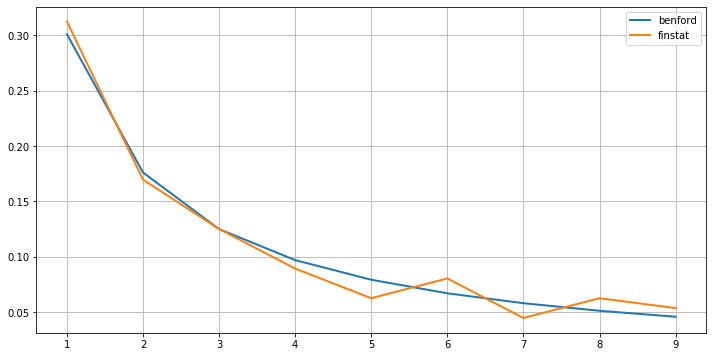

In [16]:
df_ratio.plot()

## RMSE 와 최대오차

$$
RMSE = \sqrt{\frac{\sum_{i=1}^{9}{(P(i) - P_{benford}(i))^2}}{9}} 
$$


In [17]:
rmse = ((df_ratio['finstat'] - df_ratio['benford']) ** 2).mean() ** 0.5
rmse

0.010839225001669731

In [18]:
np.abs(df_ratio['finstat'] - df_ratio['benford']).max()

0.016681246047624818

# 함수로 정리

In [19]:
import re
import numpy as np

def benford(df_list, plot=True):
  val_list = []
  # 전달된 데이터프레임 리스트에서 숫자 문자열만 추출
  for df in df_list:
    df = df.astype(str)
    # 특정 문자열을 포함하는 데이터프레임만 대상
    if any(x in df.to_html() for x in ['유동자산', '매출원가', '포괄손익', '현금흐름', '당기순이익']):
      values = df.replace('[^0-9]', '', regex=True).values.reshape(-1)
      val_list.extend(values)

  # 첫 글자 목록 추출
  leading_digits = [int(v[0]) for v in val_list if v]

  # 개수 세기
  counter = {i:0 for i in range(1, 10)}
  for i in leading_digits:
    counter[i] =  counter.get(i, 0) + 1

  # 비율 구하기
  total = sum(counter.values())
  finstat_ratio = {i: counter[i]/total for i in counter.keys()}

  # 데이터 프레임을 생성하여 반환
  benford_values =  {d:np.log10((d+1)/d) for d in range(1,10)}
  df_ratio = pd.DataFrame({
    'benford': benford_values,
    'finstat': finstat_ratio
  })
  if plot:
    df_ratio.plot()
  return df_ratio

# return RMSE와 최대오차(max)
def benford_desc(df_list):
  df = benford(df_list, plot=False)
  rmse = ((df['finstat'] - df['benford']) ** 2).mean() ** 0.5
  max_err = np.abs(df['finstat'] - df['benford']).max()
  return rmse, max_err

## 모뉴엘	감사보고서 (2009.06)
http://dart.fss.or.kr/dsaf001/main.do?rcpNo=20090610000036

#### 재 무 제 표 (2008, 2009년)
http://dart.fss.or.kr/report/viewer.do?rcpNo=20090610000036&dcmNo=2330874&eleId=3&offset=9520&length=101157&dtd=dart3.xsd


In [20]:
import pandas as pd

url = 'http://dart.fss.or.kr/report/viewer.do?rcpNo=20090610000036&dcmNo=2330874&eleId=3&offset=9520&length=101157&dtd=dart3.xsd'
dfs = pd.read_html(url)
len(dfs)

16

In [21]:
dfs[14].head(10)

,과 목,제 5(당) 기,제 5(당) 기.1,제 4(전) 기,제 4(전) 기.1
0,Ⅰ. 영업활동으로 인한 현금흐름,NaN,"(13,485,949,268)",NaN,"(9,470,917,414)"
1,1. 당기순이익,7058328249,NaN,1230452397,NaN
2,2. 현금의 유출이 없는 비용 등의가산,1976501610,NaN,294925697,NaN
3,가. 매출채권매각손실,676839852,NaN,160677645,NaN
4,나. 감가상각비,47488363,NaN,16954023,NaN
5,다. 무형자산상각비,3732000,NaN,2834000,NaN
6,라. 대손상각비,193990867,NaN,6677932,NaN
7,마. 퇴직급여,69668803,NaN,40310697,NaN
8,바. 외화환산손실,984781725,NaN,67471400,NaN
9,3. 현금의 유입이 없는 수익 등의 차감,"(1,013,905,960)",NaN,"(101,769,720)",NaN


,benford,finstat
1,0.301030,0.372152
2,0.176091,0.177215
3,0.124939,0.093671
4,0.096910,0.096203
5,0.079181,0.070886
6,0.066947,0.070886
7,0.057992,0.048101
8,0.051153,0.027848
9,0.045757,0.043038


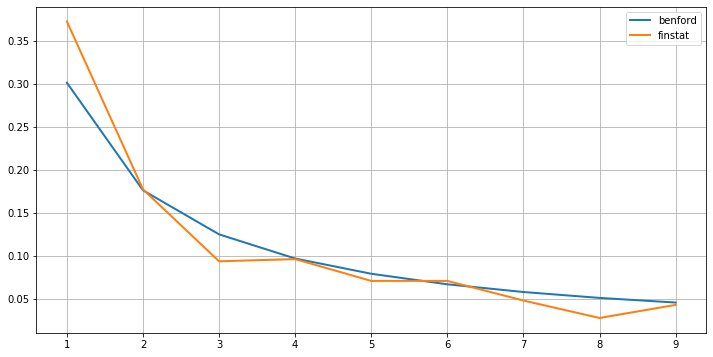

In [22]:
df = benford(dfs)
df

In [23]:
benford_desc(dfs)

(0.027427505525541764, 0.071121903070196)

### 2019 [FinanceData.KR](http://financedata.kr) | [facebook.com/financedata](http://facebook.com/financedata)